# Insurance Claim Fraud Detection
### Project Description
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

### Independent Variables
1.	months_as_customer: Number of months of patronage

2.	age: the length of time a customer has lived or a thing has existed

3.	policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer

4.	policy_bind_date:date which document that is given to customer after we accept your proposal for insurance

5.	policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period

6.	policy_csl: is basically Combined Single Limit

7.	policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss

8.	policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year

9.	umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies

10.	insured_zip: It is the zip code where the insurance was made

11.	insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions

12.	insured_education_level: This refers to the Level of education of the customer

13.	insured_occupation: This refers Occupation of the customer

14.	insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.

15.	insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership

16.	capital-gains: This refers to profit accrued due to insurance premium

17.	capital-loss: This refers to the losses incurred due to insurance claims

18.	incident_date: This refers to the date which claims where made by customers

19.	incident_type: This refers to the type of claim/vehicle damage made by customer

20.	collision_type: This refers to the area of damage on the vehicle

21.	incident_severity: This refers to the extent/level of damage

22.	authorities_contacted: This refers to the government agencies that were contacted after damage

23.	incident_state: This refers to the state at which the accident happened

24.	incident_city: This refers to the city at which the accident happened

25.	1ncident_location: This refers to the location at which the accident happened

26.	incident_hour_of_the_day: The period of the day which accident took place

27.	number_of_vehicles_involved: This refers to number of vehicles involved the accident

28.	property_damage: This refers to whether property was damaged or not

29.	bodily_injuries: This refers to injuries sustained

30.	witnesses: This refers to the number of witnesses involved

31.	police_report_available: This refers to whether the report on damage was documented or not

32.	total_claim_amount: This refers to the financial implications involved in claims

33.	injury_claim: This refers to physical injuries sustained

34.	property_claim: This refers to property damages during incident

35.	vehicle_claim: This refers to property damages during incident

36.	auto_make: This refers to the make of the vehicle

37.	auto_model: This refers to the model of the vehicle

38.	auto_year: This refers to the year which the vehicle was manufactured

39.	_c39:

40.	fraud_reported

### Dataset Link-  https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv")
df

,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES.1,71610,6510,13020,52080,Saab,92x,2004,Y
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
3,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
995,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
996,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
997,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [3]:
df.columns

Index(['328', '48', '521585', '17-10-2014', 'OH', '250/500', '1000', '1406.91',
       '0', '466132', 'MALE', 'MD', 'craft-repair', 'sleeping', 'husband',
       '53300', '0.1', '25-01-2015', 'Single Vehicle Collision',
       'Side Collision', 'Major Damage', 'Police', 'SC', 'Columbus',
       '9935 4th Drive', '5', '1', 'YES', '1.1', '2', 'YES.1', '71610', '6510',
       '13020', '52080', 'Saab', '92x', '2004', 'Y'],
      dtype='object')

In [4]:
df = df.rename({"328":"months_as_customer", "48":"age", "521585": "policy_number", "17-10-2014": "policy_bind_date",
               "OH":"policy_state", "250/500":"policy_csl", "1000":"policy_deductable", "1406.91":"policy_annual_premium",
               "0":"umbrella_limit", "466132":"insured_zip", "MALE":"insured_sex", "MD":"insured_education_level",
               "craft-repair":"insured_occupation", "sleeping":"insured_hobbies", "husband":"insured_relationship",
               "53300":"capital-gains", "0.1":"capital-loss", "25-01-2015":"incident_date", 
               "Single Vehicle Collision":"incident_type", "Side Collision":"collision_type",
               "Major Damage":"incident_severity", "Police":"authorities_contacted", "SC":"incident_state", 
               "Columbus":"incident_city", "9935 4th Drive":"1ncident_location", "5":"incident_hour_of_the_day", 
               "1":"number_of_vehicles_involved", "YES":"property_damage", "1.1":"bodily_injuries", 
               "2":"witnesses", "YES.1":"police_report_available", "71610":"total_claim_amount", 
               "6510":"injury_claim", "13020":"property_claim", "52080":"vehicle_claim", "Saab":"auto_make",
               "92x":"auto_model", "2004":"auto_year", "Y":"fraud_reported"}, axis='columns')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
3,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
995,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
996,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
997,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [5]:
df.shape

(999, 39)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           999 non-null    int64  
 1   age                          999 non-null    int64  
 2   policy_number                999 non-null    int64  
 3   policy_bind_date             999 non-null    object 
 4   policy_state                 999 non-null    object 
 5   policy_csl                   999 non-null    object 
 6   policy_deductable            999 non-null    int64  
 7   policy_annual_premium        999 non-null    float64
 8   umbrella_limit               999 non-null    int64  
 9   insured_zip                  999 non-null    int64  
 10  insured_sex                  999 non-null    object 
 11  insured_education_level      999 non-null    object 
 12  insured_occupation           999 non-null    object 
 13  insured_hobbies     

In [7]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
1ncident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [8]:
search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
for c in df:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((df[c] == s).sum())

  in months_as_customer =  0
? in months_as_customer =  0
- in months_as_customer =  0
 ? in months_as_customer =  0
 - in months_as_customer =  0
?  in months_as_customer =  0
-  in months_as_customer =  0
 ?  in months_as_customer =  0
 -  in months_as_customer =  0
NA in months_as_customer =  0
N/A in months_as_customer =  0
 NA in months_as_customer =  0
 N/A in months_as_customer =  0
  in age =  0
? in age =  0
- in age =  0
 ? in age =  0
 - in age =  0
?  in age =  0
-  in age =  0
 ?  in age =  0
 -  in age =  0
NA in age =  0
N/A in age =  0
 NA in age =  0
 N/A in age =  0
  in policy_number =  0
? in policy_number =  0
- in policy_number =  0
 ? in policy_number =  0
 - in policy_number =  0
?  in policy_number =  0
-  in policy_number =  0
 ?  in policy_number =  0
 -  in policy_number =  0
NA in policy_number =  0
N/A in policy_number =  0
 NA in policy_number =  0
 N/A in policy_number =  0
  in policy_bind_date =  0
? in policy_bind_date =  0
- in policy_bind_date =  0


In [9]:
(df=='?').sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
1ncident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [10]:
df.replace({'?': np.nan}, inplace=True)

In [11]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
1ncident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [12]:
df.collision_type.unique()

array([nan, 'Rear Collision', 'Front Collision', 'Side Collision'],
      dtype=object)

In [13]:
df.collision_type.mode()

0    Rear Collision
Name: collision_type, dtype: object

In [14]:
df.collision_type.isnull().sum()/1000*100

17.8

In [15]:
(df['collision_type'] == 'Rear Collision').sum()/df.collision_type.count()*100

35.56638246041413

In [16]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent' )

In [17]:
si = si.fit(df[['collision_type']])

In [18]:
df[['collision_type']] = si.transform(df[['collision_type']])

In [19]:
df[['collision_type']].isnull().sum()

collision_type    0
dtype: int64

In [20]:
df.property_damage.unique()

array([nan, 'NO', 'YES'], dtype=object)

In [21]:
df.property_damage.mode()

0    NO
Name: property_damage, dtype: object

In [22]:
df.property_damage.isnull().sum()/1000*100

36.0

In [23]:
(df['property_damage'] == 'NO').sum()/df.property_damage.count()*100 

52.895148669796555

In [24]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent' )

In [25]:
si = si.fit(df[['property_damage']])

In [26]:
df[['property_damage']] = si.transform(df[['property_damage']])

In [27]:
df[['property_damage']].isnull().sum()

property_damage    0
dtype: int64

In [28]:
df.police_report_available.unique()

array([nan, 'NO', 'YES'], dtype=object)

In [29]:
df.police_report_available.mode()

0    NO
Name: police_report_available, dtype: object

In [30]:
df.police_report_available.isnull().sum()/1000*100

34.300000000000004

In [31]:
(df['police_report_available'] == 'NO').sum()/df.police_report_available.count()*100

52.286585365853654

In [32]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent' )

In [33]:
si = si.fit(df[['police_report_available']])

In [34]:
df[['police_report_available']] = si.transform(df[['police_report_available']])

In [35]:
df[['police_report_available']].isnull().sum()

police_report_available    0
dtype: int64

In [36]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
1ncident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [37]:
df.nunique()

months_as_customer             391
age                             46
policy_number                  999
policy_bind_date               950
policy_state                     3
policy_csl                       3
policy_deductable                3
policy_annual_premium          990
umbrella_limit                  11
insured_zip                    994
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_date                   60
incident_type                    4
collision_type                   3
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
1ncident_location              999
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  2
bodily_injuries     

In [38]:
df.dtypes[df.dtypes == 'object']

policy_bind_date           object
policy_state               object
policy_csl                 object
insured_sex                object
insured_education_level    object
insured_occupation         object
insured_hobbies            object
insured_relationship       object
incident_date              object
incident_type              object
collision_type             object
incident_severity          object
authorities_contacted      object
incident_state             object
incident_city              object
1ncident_location          object
property_damage            object
police_report_available    object
auto_make                  object
auto_model                 object
fraud_reported             object
dtype: object

In [39]:
df.dtypes[df.dtypes != 'object']

months_as_customer               int64
age                              int64
policy_number                    int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
capital-gains                    int64
capital-loss                     int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
auto_year                        int64
dtype: object

In [40]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,203.829830,38.938939,546263.326326,1136.136136,1256.255495,1.102102e+06,501249.605606,25097.897898,-26820.520521,11.650651,1.839840,0.991992,1.486486,52743.073073,7434.344344,7393.943944,37914.784785,2005.104104
std,115.103809,9.140370,257190.576942,612.155989,244.243187,2.298293e+06,71728.919924,27871.869471,28105.366259,6.951671,1.019044,0.820538,1.111773,26408.011569,4883.309038,4823.859773,18890.397013,6.018773
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,115.500000,32.000000,335913.500000,500.000000,1089.185000,0.000000e+00,448373.000000,0.000000,-51500.000000,6.000000,1.000000,0.000000,1.000000,41775.000000,4290.000000,4440.000000,30275.000000,2000.000000
50%,199.000000,38.000000,533940.000000,1000.000000,1257.040000,0.000000e+00,466498.000000,0.000000,-24100.000000,12.000000,1.000000,1.000000,1.000000,57970.000000,6780.000000,6750.000000,42080.000000,2005.000000
75%,276.000000,44.000000,759459.500000,2000.000000,1415.710000,0.000000e+00,603254.000000,51000.000000,0.000000,17.000000,3.000000,2.000000,2.000000,70550.000000,11310.000000,10870.000000,50775.000000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000


In [41]:
df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [42]:
df['fraud_reported'].value_counts()

N    753
Y    246
Name: fraud_reported, dtype: int64

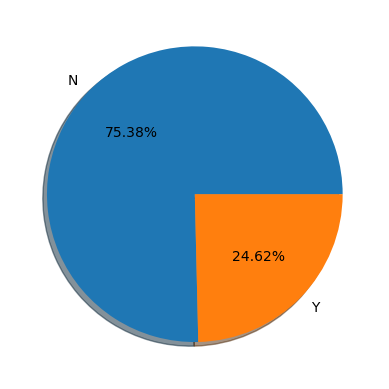

In [43]:
labels = 'N','Y'
fig, ax = plt.subplots()
ax.pie(df['fraud_reported'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

In [44]:
df.dtypes[df.dtypes == 'object']

policy_bind_date           object
policy_state               object
policy_csl                 object
insured_sex                object
insured_education_level    object
insured_occupation         object
insured_hobbies            object
insured_relationship       object
incident_date              object
incident_type              object
collision_type             object
incident_severity          object
authorities_contacted      object
incident_state             object
incident_city              object
1ncident_location          object
property_damage            object
police_report_available    object
auto_make                  object
auto_model                 object
fraud_reported             object
dtype: object

In [45]:
df['policy_bind_date'].unique()

array(['27-06-2006', '06-09-2000', '25-05-1990', '06-06-2014',
       '12-10-2006', '04-06-2000', '03-02-1990', '05-02-1997',
       '25-07-2011', '26-05-2002', '29-05-1999', '20-11-1997',
       '26-10-2012', '28-12-1998', '19-10-1992', '08-06-2005',
       '15-11-2004', '28-12-2014', '02-08-1992', '25-06-2002',
       '27-11-2005', '27-05-1994', '08-02-1991', '02-02-1996',
       '05-12-2013', '20-09-1990', '18-07-2002', '08-02-1990',
       '04-03-2014', '18-02-2000', '19-06-2008', '01-08-2003',
       '04-04-1992', '13-01-1991', '08-08-2010', '09-03-2003',
       '03-02-1993', '25-11-2002', '27-07-1997', '08-05-1995',
       '30-08-2012', '30-04-2006', '13-04-2003', '05-12-2007',
       '21-08-2006', '08-01-1990', '18-03-1990', '07-01-2008',
       '10-03-1997', '10-01-2004', '20-08-1994', '02-06-2002',
       '28-04-1994', '17-08-2014', '11-08-2007', '20-11-2008',
       '18-10-1995', '19-05-1993', '26-02-2005', '14-02-1990',
       '30-09-1993', '10-06-2014', '28-10-2008', '24-04

In [46]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])

In [47]:
df['Bind_Year']=df['policy_bind_date'].apply(lambda y:y.year)

In [48]:
df.drop(columns = ['policy_bind_date'],inplace = True)

In [49]:
df.Bind_Year.max()

2015

In [50]:
df['Bind_Age'] = df['Bind_Year'].apply(lambda y: 2016 - y)
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Bind_Year,Bind_Age
0,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,5070,780,780,3510,Mercedes,E400,2007,Y,2006,10
1,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,34650,7700,3850,23100,Dodge,RAM,2007,N,2000,16
2,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1990,26
3,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,6500,1300,650,4550,Accura,RSX,2009,N,2014,2
4,256,39,104594,OH,250/500,1000,1351.10,0,478456,FEMALE,...,64100,6410,6410,51280,Saab,95,2003,Y,2006,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,38,941851,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,87200,17440,8720,61040,Honda,Accord,2006,N,1991,25
995,285,41,186934,IL,100/300,1000,1436.79,0,608177,FEMALE,...,108480,18080,18080,72320,Volkswagen,Passat,2015,N,2014,2
996,130,34,918516,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,67500,7500,7500,52500,Suburu,Impreza,1996,N,2003,13
997,458,62,533940,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,46980,5220,5220,36540,Audi,A5,1998,N,2011,5


In [51]:
df.drop(columns = ['Bind_Year'],inplace = True)

In [52]:
df['policy_state'].value_counts()

OH    351
IL    338
IN    310
Name: policy_state, dtype: int64

In [53]:
df['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [54]:
df['insured_sex'].value_counts()

FEMALE    537
MALE      462
Name: insured_sex, dtype: int64

In [55]:
df['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             143
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

In [56]:
df['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         73
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

In [57]:
df['insured_hobbies'].value_counts()

reading           64
paintball         57
exercise          57
bungie-jumping    56
movies            55
camping           55
golf              55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          40
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

In [58]:
df['incident_date'].value_counts()

02-02-2015    28
17-02-2015    26
07-01-2015    25
10-01-2015    24
04-02-2015    24
24-01-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
12-02-2015    20
22-02-2015    20
31-01-2015    20
06-02-2015    20
21-01-2015    19
12-01-2015    19
14-01-2015    19
23-02-2015    19
21-02-2015    19
01-01-2015    19
20-01-2015    18
18-01-2015    18
28-02-2015    18
25-02-2015    18
03-01-2015    18
14-02-2015    18
01-02-2015    18
24-02-2015    17
06-01-2015    17
26-02-2015    17
08-02-2015    17
09-01-2015    17
13-02-2015    16
16-02-2015    16
05-02-2015    16
15-02-2015    16
16-01-2015    16
15-01-2015    15
28-01-2015    15
17-01-2015    15
18-02-2015    15
20-02-2015    14
27-02-2015    14
22-01-2015    14
09-02-2015    13
03-02-2015    13
23-01-2015    13
27-01-2015    13
01-03-2015    12
04-01-2015    12
26-01-2015    11
29-01-2015    11
02-01-2015    11
19-02-2015    10
10-02-2015    10
11-02-2015    10
07-02-2015    10
25-01-2015     9
11-01-2015    

In [59]:
df['incident_date']=pd.to_datetime(df['incident_date'])

In [60]:
df['incident_month']=df['incident_date'].apply(lambda m:m.month)

In [61]:
df.drop(columns=['incident_date'],inplace=True)

In [62]:
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Bind_Age,incident_month
0,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,5070,780,780,3510,Mercedes,E400,2007,Y,10,1
1,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,34650,7700,3850,23100,Dodge,RAM,2007,N,16,2
2,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,26,10
3,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,6500,1300,650,4550,Accura,RSX,2009,N,2,2
4,256,39,104594,OH,250/500,1000,1351.10,0,478456,FEMALE,...,64100,6410,6410,51280,Saab,95,2003,Y,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,38,941851,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,87200,17440,8720,61040,Honda,Accord,2006,N,25,2
995,285,41,186934,IL,100/300,1000,1436.79,0,608177,FEMALE,...,108480,18080,18080,72320,Volkswagen,Passat,2015,N,2,1
996,130,34,918516,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,67500,7500,7500,52500,Suburu,Impreza,1996,N,13,1
997,458,62,533940,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,46980,5220,5220,36540,Audi,A5,1998,N,5,2


In [63]:
df['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    402
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [64]:
df['collision_type'].unique()

array(['Rear Collision', 'Front Collision', 'Side Collision'],
      dtype=object)

In [65]:
df['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      275
Trivial Damage     90
Name: incident_severity, dtype: int64

In [66]:
df['authorities_contacted'].value_counts()

Police       291
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

In [67]:
df['incident_state'].value_counts()

NY    262
SC    247
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

In [68]:
df['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       148
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

In [69]:
df['1ncident_location'].value_counts()

6608 MLK Hwy           1
7976 Britain Drive     1
2352 MLK Drive         1
9734 2nd Ridge         1
3122 Apache Drive      1
                      ..
4119 Texas St          1
4347 2nd Ridge         1
1091 1st Drive         1
8203 Lincoln Ave       1
1416 Cherokee Ridge    1
Name: 1ncident_location, Length: 999, dtype: int64

In [70]:
df['property_damage'].value_counts()

NO     698
YES    301
Name: property_damage, dtype: int64

In [71]:
df['police_report_available'].value_counts()

NO     686
YES    313
Name: police_report_available, dtype: int64

In [72]:
df['auto_make'].value_counts()

Dodge         80
Suburu        80
Saab          79
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

In [73]:
df['auto_model'].value_counts()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
Camry             28
Forrestor         28
E400              27
92x               27
95                27
F150              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

In [74]:
df.dtypes[df.dtypes != 'object']

months_as_customer               int64
age                              int64
policy_number                    int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
capital-gains                    int64
capital-loss                     int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
auto_year                        int64
Bind_Age                         int64
incident_month                   int64
dtype: object

In [75]:
df['auto_age'] = df['auto_year'].apply(lambda y: 2016 - y)

In [76]:
df.drop(columns=['auto_year'],inplace=True)

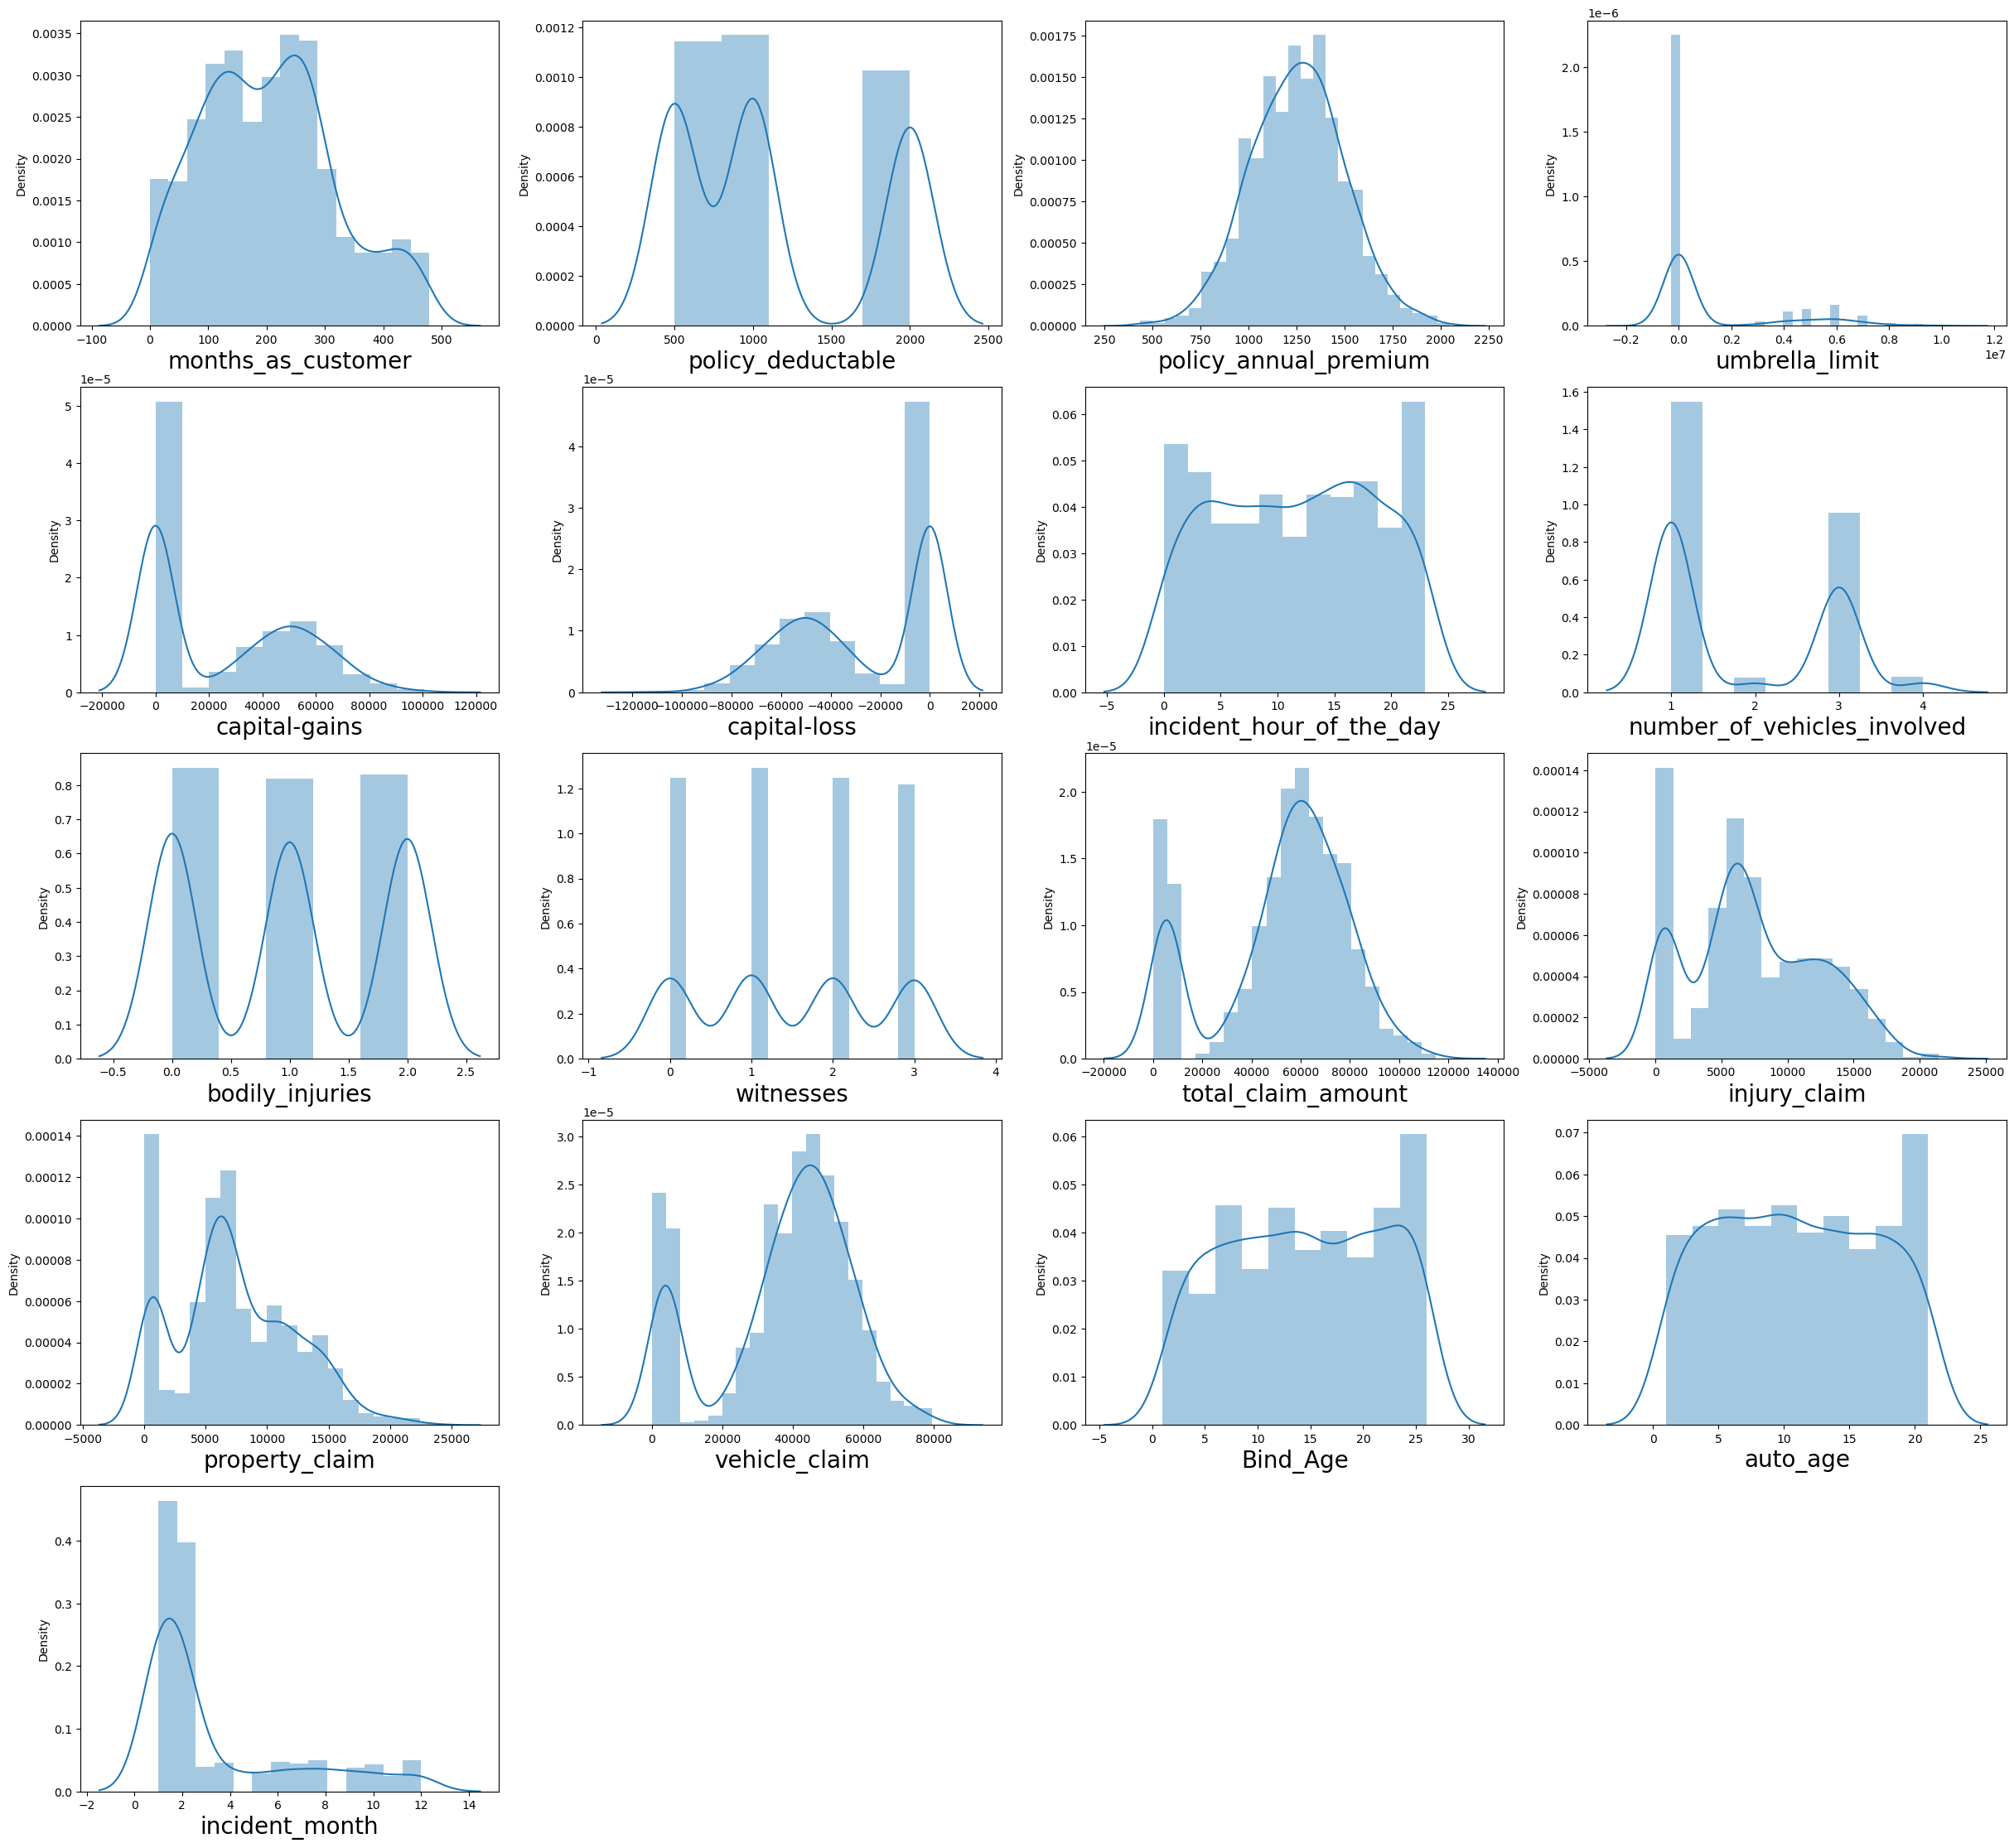

In [77]:
plt.figure(figsize=(30,45),facecolor='white')
plotnum=1
for col in df[['months_as_customer','policy_deductable','policy_annual_premium','umbrella_limit','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim','Bind_Age','auto_age','incident_month']]:
    if plotnum<=30:
        plt.subplot(8,4,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [78]:
df.incident_month.value_counts()

1     364
2     312
8      39
12     39
6      37
4      36
7      35
10     34
3      31
9      30
5      23
11     19
Name: incident_month, dtype: int64

In [79]:
df[['months_as_customer','policy_deductable','policy_annual_premium','umbrella_limit',
     'capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved',
     'bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim',
     'Bind_Age','auto_age']].skew()

months_as_customer             0.364615
policy_deductable              0.477027
policy_annual_premium          0.006022
umbrella_limit                 1.805104
capital-gains                  0.481352
capital-loss                  -0.389813
incident_hour_of_the_day      -0.037615
number_of_vehicles_involved    0.501009
bodily_injuries                0.014799
witnesses                      0.020923
total_claim_amount            -0.592958
injury_claim                   0.264131
property_claim                 0.380670
vehicle_claim                 -0.619480
Bind_Age                      -0.052972
auto_age                       0.048812
dtype: float64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           999 non-null    int64  
 1   age                          999 non-null    int64  
 2   policy_number                999 non-null    int64  
 3   policy_state                 999 non-null    object 
 4   policy_csl                   999 non-null    object 
 5   policy_deductable            999 non-null    int64  
 6   policy_annual_premium        999 non-null    float64
 7   umbrella_limit               999 non-null    int64  
 8   insured_zip                  999 non-null    int64  
 9   insured_sex                  999 non-null    object 
 10  insured_education_level      999 non-null    object 
 11  insured_occupation           999 non-null    object 
 12  insured_hobbies              999 non-null    object 
 13  insured_relationship

In [81]:
df.drop(columns=['policy_number','insured_zip','1ncident_location'],inplace=True)

df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,Bind_Age,incident_month,auto_age
0,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,5070,780,780,3510,Mercedes,E400,Y,10,1,9
1,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,34650,7700,3850,23100,Dodge,RAM,N,16,2,9
2,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,63400,6340,6340,50720,Chevrolet,Tahoe,Y,26,10,2
3,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,6500,1300,650,4550,Accura,RSX,N,2,2,7
4,256,39,OH,250/500,1000,1351.10,0,FEMALE,PhD,tech-support,...,64100,6410,6410,51280,Saab,95,Y,10,2,13


In [82]:
df.skew()

months_as_customer             0.364615
age                            0.481461
policy_deductable              0.477027
policy_annual_premium          0.006022
umbrella_limit                 1.805104
capital-gains                  0.481352
capital-loss                  -0.389813
incident_hour_of_the_day      -0.037615
number_of_vehicles_involved    0.501009
bodily_injuries                0.014799
witnesses                      0.020923
total_claim_amount            -0.592958
injury_claim                   0.264131
property_claim                 0.380670
vehicle_claim                 -0.619480
Bind_Age                      -0.052972
incident_month                 1.374512
auto_age                       0.048812
dtype: float64

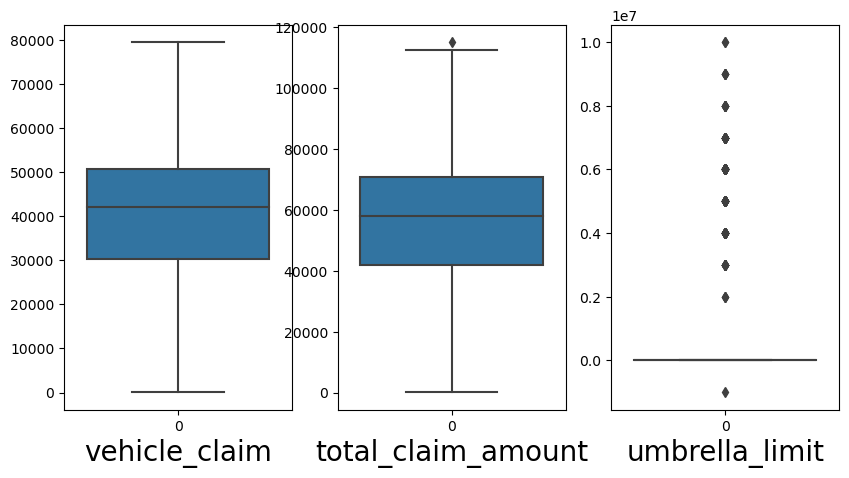

In [83]:
plt.figure(figsize=(10,5),facecolor='white')
plotnum=1
for col in df[['vehicle_claim','total_claim_amount','umbrella_limit']]:
    if plotnum<=3:
        plt.subplot(1,3,plotnum)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

## Reducing skewness using PowerTransformer

In [84]:
from sklearn.preprocessing import PowerTransformer

powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

df4 = df[['vehicle_claim','total_claim_amount']]

transformed= powtrans.fit_transform(df4)

transformed = pd.DataFrame(transformed, columns=df4.columns)


transformed.skew()

vehicle_claim        -0.522298
total_claim_amount   -0.509961
dtype: float64

In [85]:
transformed.index = df.index

In [86]:
df[['vehicle_claim','total_claim_amount']]=transformed[['vehicle_claim','total_claim_amount']]
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,Bind_Age,incident_month,auto_age
0,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,-1.776284,780,780,-1.785951,Mercedes,E400,Y,10,1,9
1,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,-0.715499,7700,3850,-0.819532,Dodge,RAM,N,16,2,9
2,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,0.392225,6340,6340,0.678218,Chevrolet,Tahoe,Y,26,10,2
3,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,-1.729020,1300,650,-1.739271,Accura,RSX,N,2,2,7
4,256,39,OH,250/500,1000,1351.10,0,FEMALE,PhD,tech-support,...,0.419738,6410,6410,0.709503,Saab,95,Y,10,2,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,38,OH,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,...,1.338726,17440,8720,1.259243,Honda,Accord,N,25,2,10
995,285,41,IL,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,...,2.201275,18080,18080,1.904070,Volkswagen,Passat,N,2,1,1
996,130,34,OH,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,...,0.553680,7500,7500,0.777761,Suburu,Impreza,N,13,1,20
997,458,62,IL,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,...,-0.246328,5220,5220,-0.103104,Audi,A5,N,5,2,18


In [87]:
df.dtypes[df.dtypes == 'object']

policy_state               object
policy_csl                 object
insured_sex                object
insured_education_level    object
insured_occupation         object
insured_hobbies            object
insured_relationship       object
incident_type              object
collision_type             object
incident_severity          object
authorities_contacted      object
incident_state             object
incident_city              object
property_damage            object
police_report_available    object
auto_make                  object
auto_model                 object
fraud_reported             object
dtype: object

In [88]:
df.nunique()

months_as_customer             391
age                             46
policy_state                     3
policy_csl                       3
policy_deductable                3
policy_annual_premium          990
umbrella_limit                  11
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_type                    4
collision_type                   3
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  2
bodily_injuries                  3
witnesses                        4
police_report_available          2
total_claim_amount             763
injury_claim                   638
property_claim      

In [89]:
df['insured_sex'] = df.insured_sex.map({'MALE':1,'FEMALE':2})

df['police_report_available'] = df.property_damage.map({'YES':2,'NO':1})

df['property_damage'] = df.property_damage.map({'YES':2,'NO':1})

In [112]:
from sklearn.preprocessing import LabelEncoder

labenc = LabelEncoder()

categ = ['authorities_contacted','incident_severity','collision_type','incident_type',
         'insured_relationship','insured_education_level','policy_csl','policy_state']


In [113]:
for col in categ:
    df[col] = labenc.fit_transform(df[col])

In [121]:
df[col]

0      1
1      2
2      0
3      0
4      2
      ..
994    2
995    0
996    2
997    0
998    2
Name: policy_state, Length: 999, dtype: int64

In [124]:
df[['auto_make']]= labenc.fit_transform(df[['auto_make']])

ValueError: Columns must be same length as key

In [94]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,Bind_Age,incident_month,auto_age
0,228,42,1,1,2000,1197.22,5000000,1,4,machine-op-inspct,...,-1.776284,780,780,-1.785951,Mercedes,E400,Y,10,1,9
1,134,29,2,0,2000,1413.14,5000000,2,6,sales,...,-0.715499,7700,3850,-0.819532,Dodge,RAM,N,16,2,9
2,256,41,0,1,2000,1415.74,6000000,2,6,armed-forces,...,0.392225,6340,6340,0.678218,Chevrolet,Tahoe,Y,26,10,2
3,228,44,0,2,1000,1583.91,6000000,1,0,sales,...,-1.729020,1300,650,-1.739271,Accura,RSX,N,2,2,7
4,256,39,2,1,1000,1351.10,0,2,6,tech-support,...,0.419738,6410,6410,0.709503,Saab,95,Y,10,2,13


In [95]:
df['fraud_reported'] = df.fraud_reported.map({'Y':1,'N':0})

In [96]:
df.dtypes[df.dtypes == 'object']

insured_occupation    object
insured_hobbies       object
incident_state        object
incident_city         object
auto_make             object
auto_model            object
dtype: object

In [97]:
df2 = df[['insured_occupation','insured_hobbies','incident_state','incident_city','auto_model','fraud_reported']].copy()

In [98]:
dumm = pd.get_dummies(df[['insured_occupation','insured_hobbies','incident_state','incident_city','auto_model']],drop_first = False)

In [99]:
dumm.columns

Index(['insured_occupation_adm-clerical', 'insured_occupation_armed-forces',
       'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving', 'insured_hobbies_base-jumping',
       'insured_hobbies_basketball', 'insured_hobbies_board-games',
       'insured_hobbies_bungie-jumping', 'insured_hobbies_camping',
       'insured_hobbies_chess', 'insured_hobbies_cross-fit',
       'insured_hobbies_dancing', 'insured_hobbies_exercise',
       'insured_hobbies_golf', 'insured_hobbies_hiking',
       'insured_hobbies_kayaking', 'insured_hobbies_movies',
  

In [100]:
dumm2 = dumm[['insured_occupation_craft-repair','insured_occupation_machine-op-inspct','insured_occupation_tech-support','incident_state_SC','incident_state_NY','insured_occupation_craft-repair','insured_occupation_transport-moving','insured_occupation_exec-managerial','insured_hobbies_cross-fit','insured_hobbies_chess','auto_model_Legacy','auto_model_TL','auto_model_Corolla','auto_model_Ultima','auto_model_Grand Cherokee','auto_model_Malibu','auto_model_Neon','auto_model_95','auto_model_Wrangler','auto_model_Camry','auto_model_RSX','auto_model_RAM','auto_model_A5','auto_model_Jetta','auto_model_ML350','auto_model_Passat','auto_model_F150','auto_model_A3','auto_model_3 Series']].copy()

In [101]:
df = df.join(dumm2)

In [102]:
df.drop(columns=['insured_occupation','insured_hobbies','incident_state','incident_city','auto_model'],inplace=True)

In [103]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_relationship,...,auto_model_Camry,auto_model_RSX,auto_model_RAM,auto_model_A5,auto_model_Jetta,auto_model_ML350,auto_model_Passat,auto_model_F150,auto_model_A3,auto_model_3 Series
0,228,42,1,1,2000,1197.22,5000000,1,4,2,...,0,0,0,0,0,0,0,0,0,0
1,134,29,2,0,2000,1413.14,5000000,2,6,3,...,0,0,1,0,0,0,0,0,0,0
2,256,41,0,1,2000,1415.74,6000000,2,6,4,...,0,0,0,0,0,0,0,0,0,0
3,228,44,0,2,1000,1583.91,6000000,1,0,4,...,0,1,0,0,0,0,0,0,0,0
4,256,39,2,1,1000,1351.10,0,2,6,4,...,0,0,0,0,0,0,0,0,0,0


In [104]:
corr = df.corr()
corr

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_relationship,...,auto_model_Camry,auto_model_RSX,auto_model_RAM,auto_model_A5,auto_model_Jetta,auto_model_ML350,auto_model_Passat,auto_model_F150,auto_model_A3,auto_model_3 Series
months_as_customer,1.000000,0.922018,-0.001611,-0.026901,0.027064,0.004355,0.016027,-0.059833,-0.001407,0.071395,...,-0.039180,0.000083,0.001343,-0.047464,0.005487,0.074754,0.039756,0.002607,0.006924,-0.043102
age,0.922018,1.000000,-0.015729,-0.015253,0.029423,0.013801,0.018613,-0.072347,0.000442,0.076375,...,-0.041351,-0.004292,-0.006681,-0.036119,0.021535,0.080745,0.020853,-0.013751,0.003632,-0.038634
policy_state,-0.001611,-0.015729,1.000000,0.000955,0.010305,0.011733,-0.029034,0.021789,-0.034988,-0.016826,...,-0.039179,0.009338,-0.033022,-0.043927,-0.009542,-0.010846,0.003848,0.056859,0.009693,-0.047436
policy_csl,-0.026901,-0.015253,0.000955,1.000000,0.003397,0.023945,0.021667,0.010829,0.009122,-0.030006,...,-0.034877,0.018144,0.019061,-0.038372,-0.028985,0.035363,0.053039,-0.035875,0.018545,-0.010449
policy_deductable,0.027064,0.029423,0.010305,0.003397,1.000000,-0.003109,0.010764,0.009499,0.015338,-0.023289,...,0.021690,-0.017025,0.009239,0.057081,0.006542,-0.043482,0.000069,-0.001772,0.034331,-0.005540
policy_annual_premium,0.004355,0.013801,0.011733,0.023945,-0.003109,1.000000,-0.005953,-0.038218,-0.020050,0.002817,...,0.038309,0.002553,0.004040,0.021724,0.036078,-0.012721,-0.003837,0.004308,0.001905,-0.006043
umbrella_limit,0.016027,0.018613,-0.029034,0.021667,0.010764,-0.005953,1.000000,-0.011212,-0.019107,0.076894,...,-0.012828,0.055099,-0.041633,-0.022934,-0.001359,-0.021908,0.033234,0.032900,-0.084861,0.013635
insured_sex,-0.059833,-0.072347,0.021789,0.010829,0.009499,-0.038218,-0.011212,1.000000,-0.008436,-0.004412,...,-0.000621,-0.008301,-0.001129,-0.025097,-0.041643,-0.025094,0.025402,-0.031119,0.022443,0.004895
insured_education_level,-0.001407,0.000442,-0.034988,0.009122,0.015338,-0.020050,-0.019107,-0.008436,1.000000,-0.022750,...,0.040409,-0.031032,-0.016439,-0.055087,0.042548,0.020911,0.020573,-0.009677,0.000806,-0.032328
insured_relationship,0.071395,0.076375,-0.016826,-0.030006,-0.023289,0.002817,0.076894,-0.004412,-0.022750,1.000000,...,-0.024254,0.005357,0.014709,0.005452,0.023846,0.019711,-0.022706,0.024639,-0.036240,-0.015826


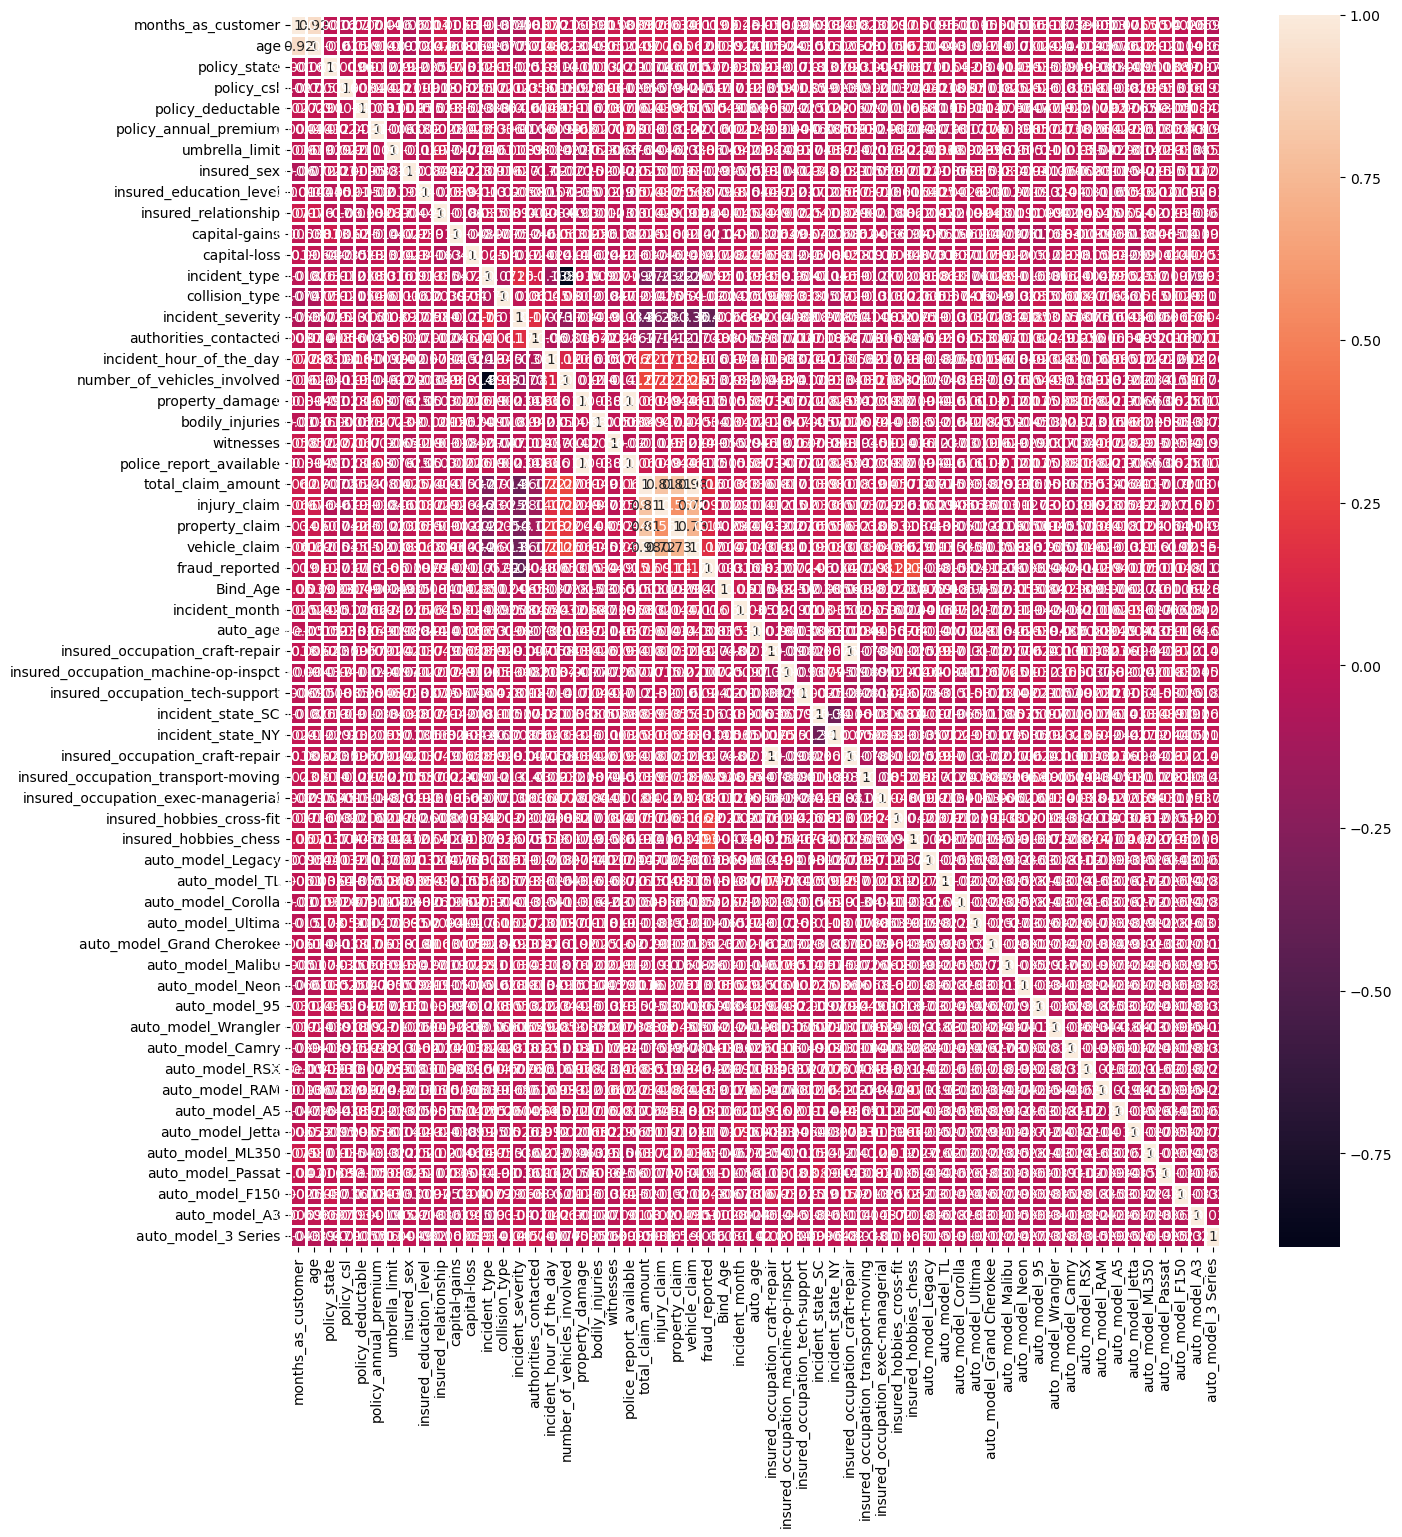

In [105]:
plt.figure(figsize=(15,16))
sns.heatmap(corr,annot=True,linewidth=1)
plt.show()

## Visualizing correlation of feature columns with label column

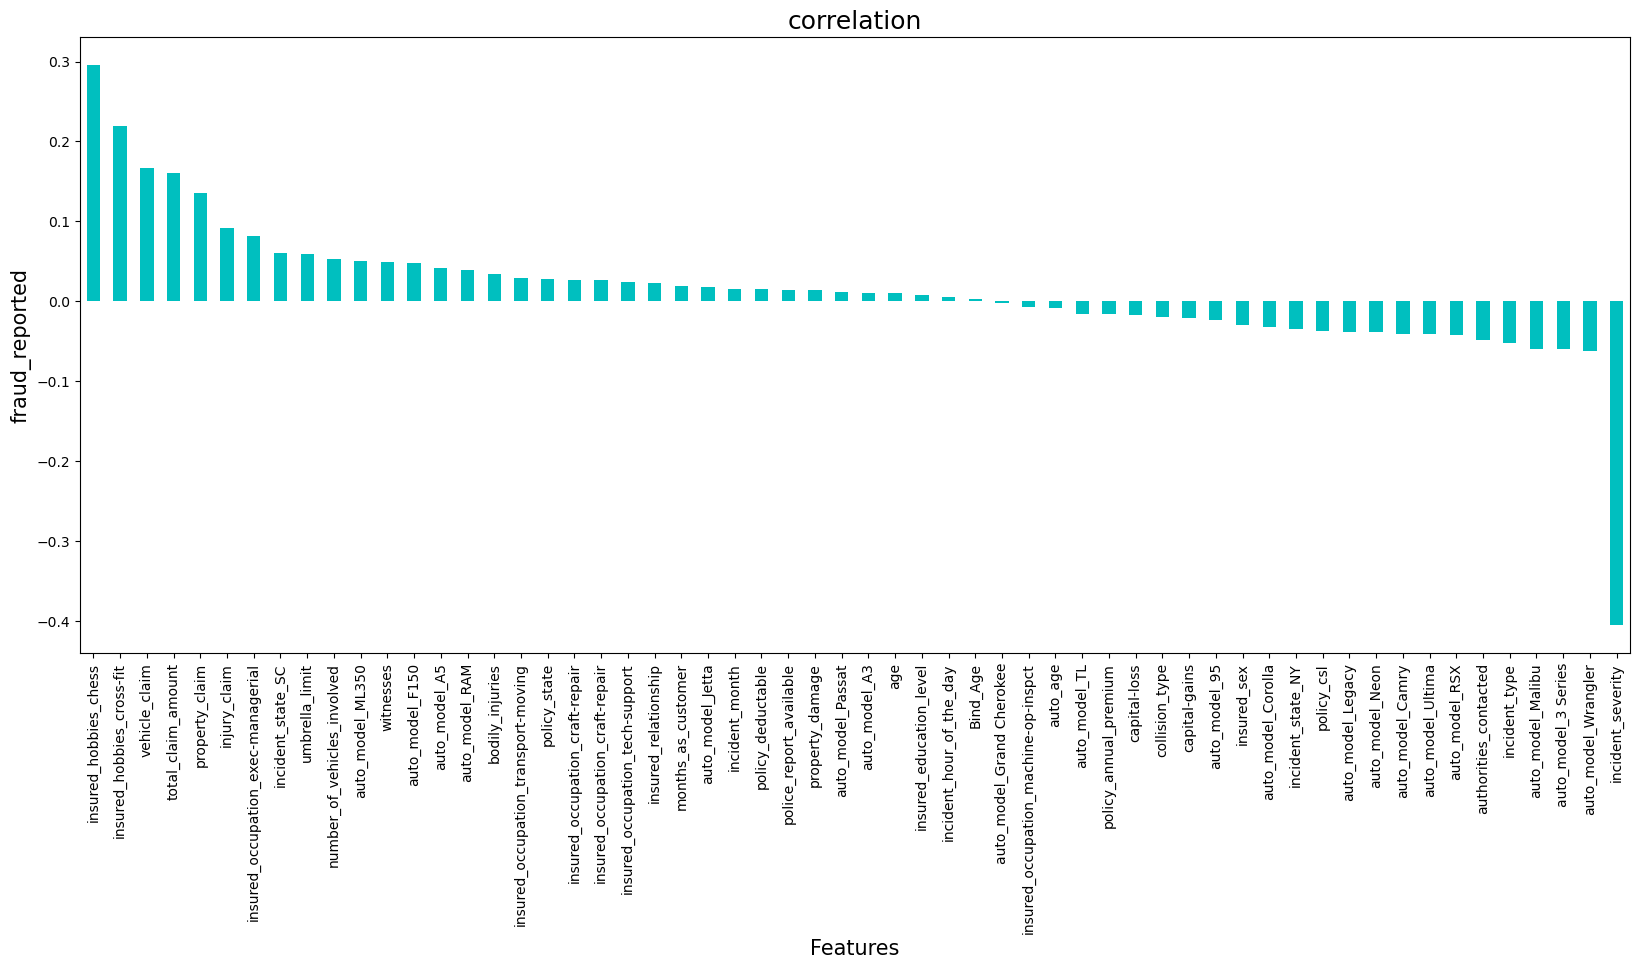

In [106]:
plt.figure(figsize = (20,8))
df.corr()['fraud_reported'].sort_values(ascending = False).drop(['fraud_reported']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('fraud_reported',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

## Feature Selection

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
x = df.drop(columns = ['fraud_reported'])
y = df['fraud_reported']

In [111]:
scaler= StandardScaler()
scaled_x = scaler.fit_transform(x)

ValueError: could not convert string to float: 'Mercedes'

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["Features"] = x.columns

vif['vif'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]

vif

NameError: name 'scaled_x' is not defined

In [115]:
df[['auto_make']]

,auto_make
0,Mercedes
1,Dodge
2,Chevrolet
3,Accura
4,Saab
...,...
994,Honda
995,Volkswagen
996,Suburu
997,Audi
